# Diabetes Dataset

Members: Dizon, Rafael | Samson, Russel Ian | Velasquez, Enrico Miguel

Dataset URL: https://data.mendeley.com/datasets/wj9rwkp9c2/1



Searched from: https://datasetsearch.research.google.com/search?src=0&query=diabetes%20prediction&docid=L2cvMTFsajY0NnEycw%3D%3D

## I. Import Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV

## Preferences

In [ ]:
#suppress warnings
warnings.filterwarnings("ignore")

# Load the dataset and standardize column names
diabetes_data = pd.read_csv('https://raw.githubusercontent.com/MrBreak2022/softdeslab_finals/refs/heads/development/Diabetes.csv')
diabetes_data.columns = diabetes_data.columns.str.lower()


## II. Exploratory Data Analysis

In [ ]:
print(diabetes_data.head())
print(diabetes_data.describe())
print(diabetes_data.info())
print(diabetes_data.isnull().sum())
print(diabetes_data.duplicated().sum())
# Drop unnecessary columns
diabetes_data = diabetes_data.drop(columns=['id', 'no_pation'])
# Standardize and clean 'class' column by stripping spaces and converting to uppercase
diabetes_data['class'] = diabetes_data['class'].str.strip().str.upper()
# Check unique values in 'class' to ensure proper encoding
print("Unique values in 'class' column before mapping:", diabetes_data['class'].value_counts(dropna=False))
# Map 'class' to numeric values: N=1, Y=2, P=3
diabetes_data['class'] = diabetes_data['class'].map({'N': 1, 'Y': 2, 'P': 3})
# Encode 'gender' column to numeric values: F=0, M=1
diabetes_data['gender'] = diabetes_data['gender'].map({'F': 0, 'M': 1})
# Handle missing value in 'gender' by filling with the mode
diabetes_data['gender'].fillna(diabetes_data['gender'].mode()[0], inplace=True)






    id  no_pation gender  age  urea  cr  hba1c  chol   tg  hdl  ldl  vldl  \
0  502      17975      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
1  735      34221      M   26   4.5  62    4.9   3.7  1.4  1.1  2.1   0.6   
2  420      47975      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
3  680      87656      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
4  504      34223      M   33   7.1  46    4.9   4.9  1.0  0.8  2.0   0.4   

    bmi class  
0  24.0     N  
1  23.0     N  
2  24.0     N  
3  24.0     N  
4  21.0     N  
                id     no_pation          age         urea           cr  \
count  1000.000000  1.000000e+03  1000.000000  1000.000000  1000.000000   
mean    340.500000  2.705514e+05    53.528000     5.124743    68.943000   
std     240.397673  3.380758e+06     8.799241     2.935165    59.984747   
min       1.000000  1.230000e+02    20.000000     0.500000     6.000000   
25%     125.750000  2.406375e+04    51.000000     3.700000    48.0

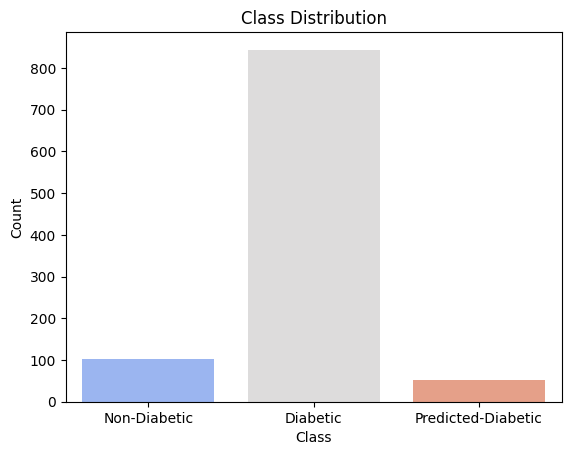

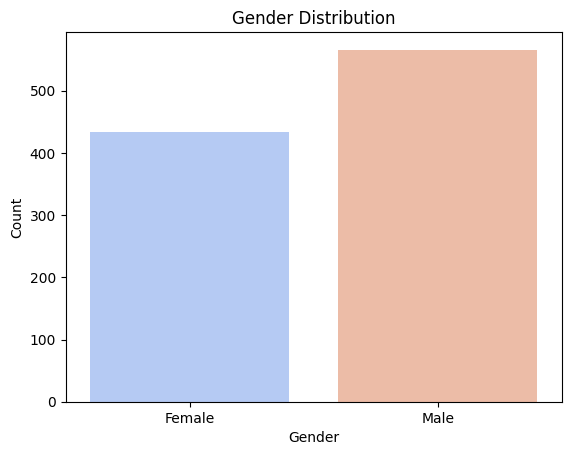

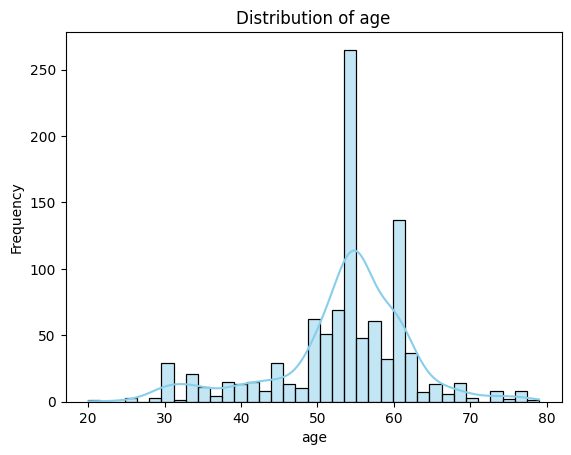

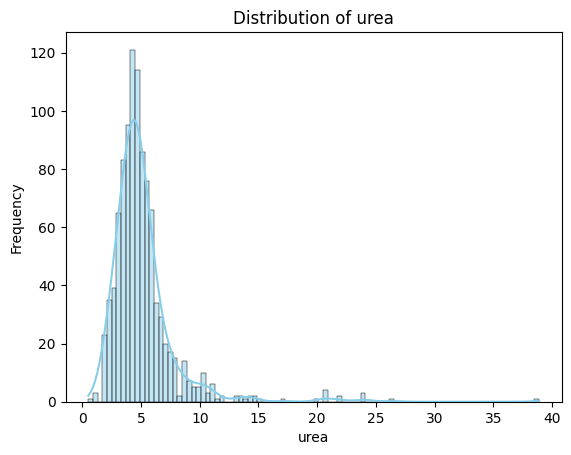

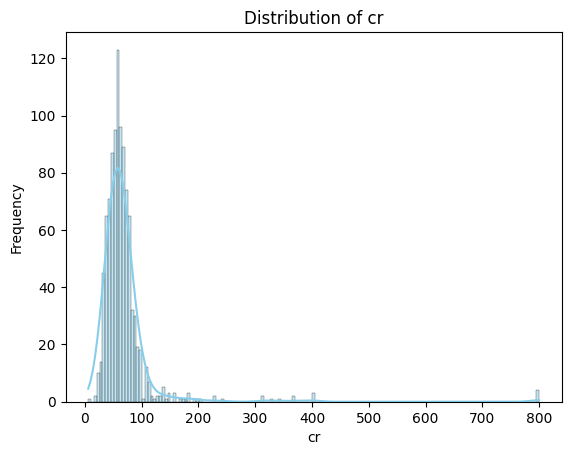

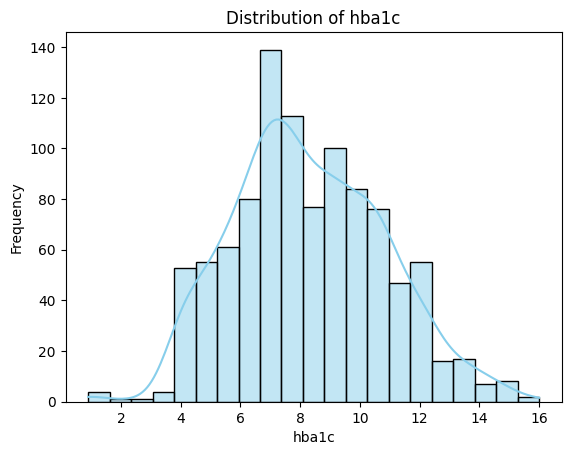

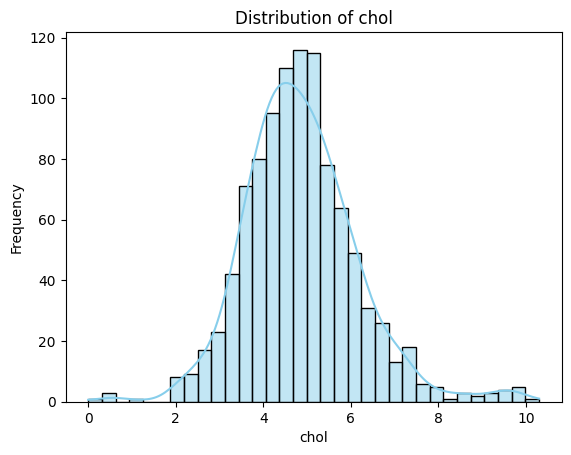

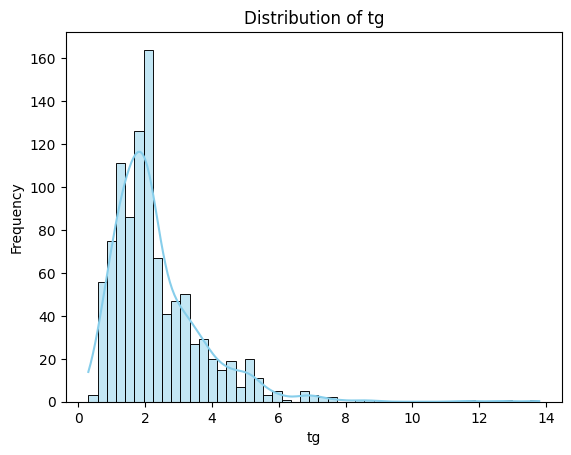

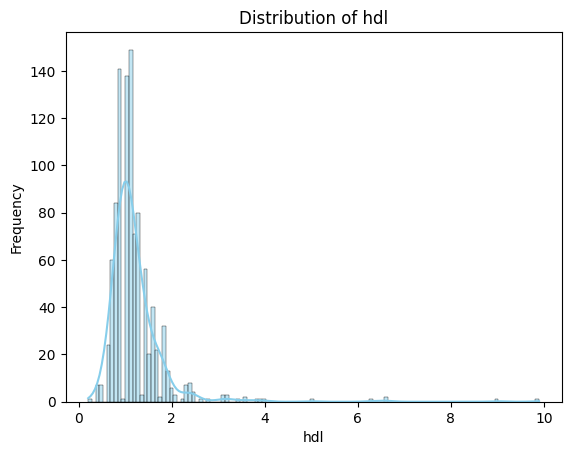

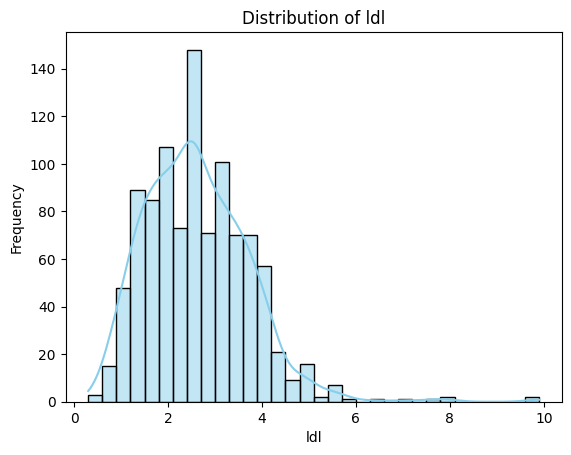

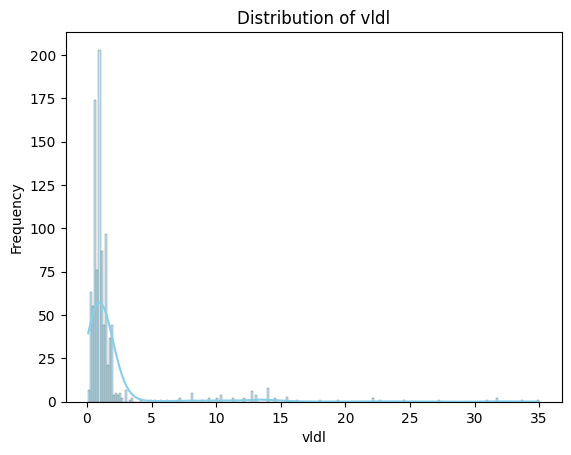

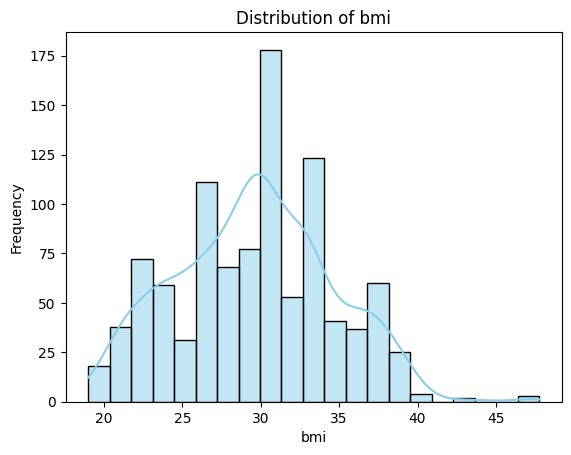

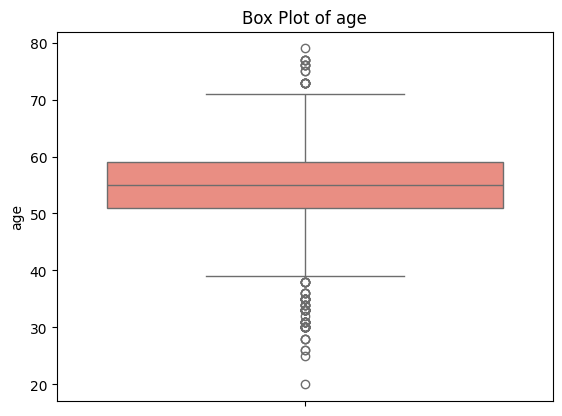

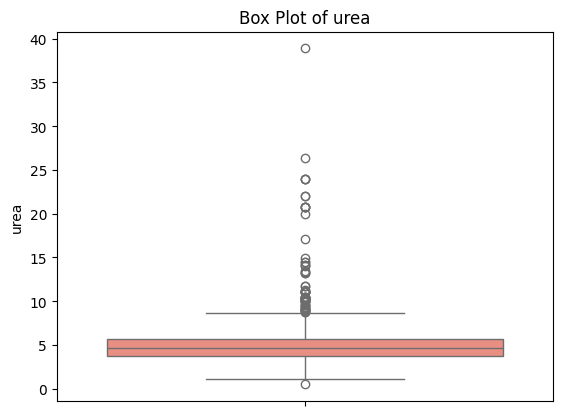

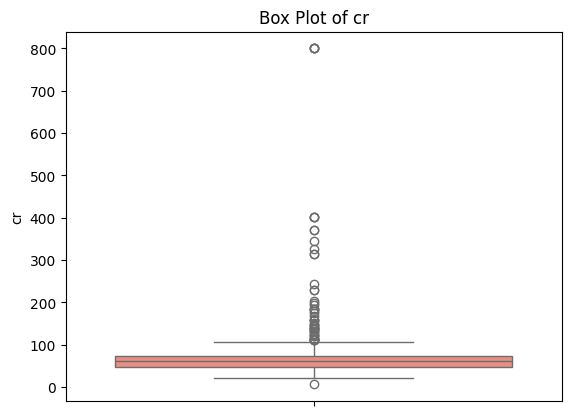

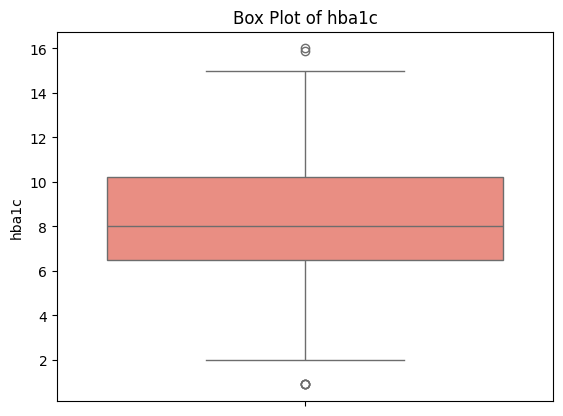

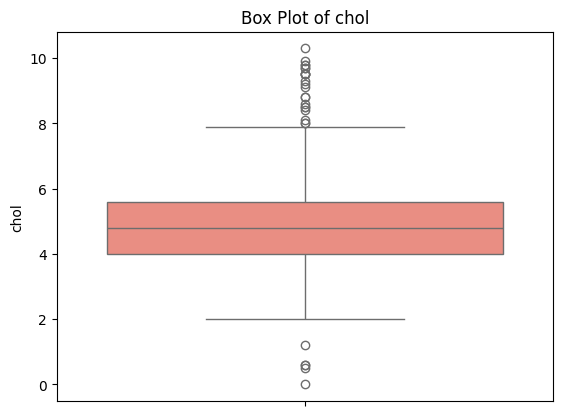

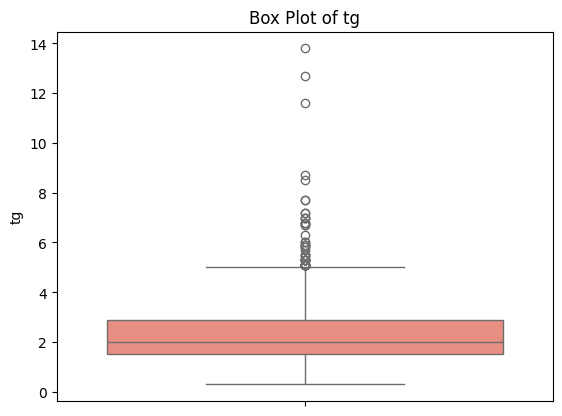

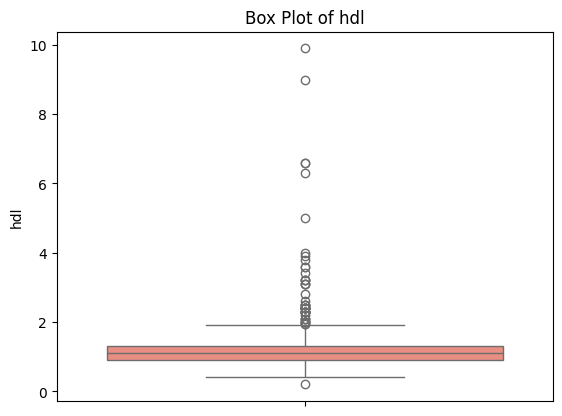

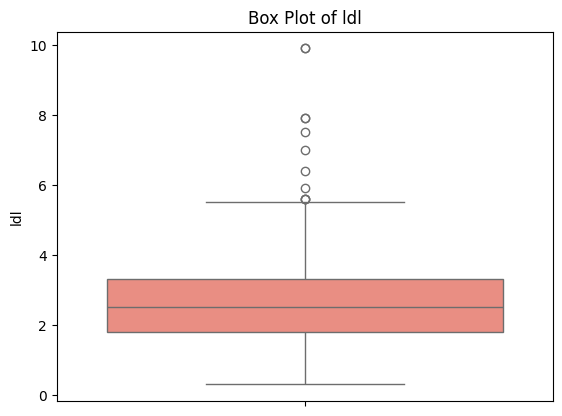

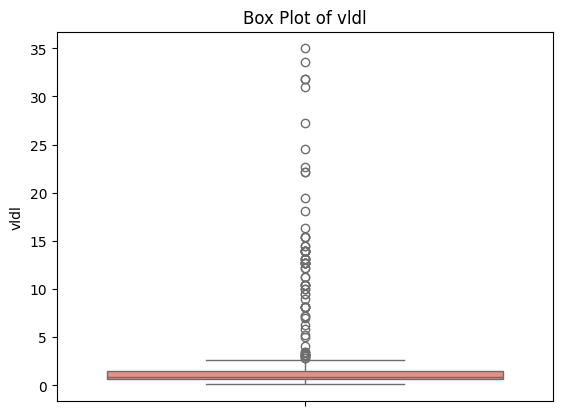

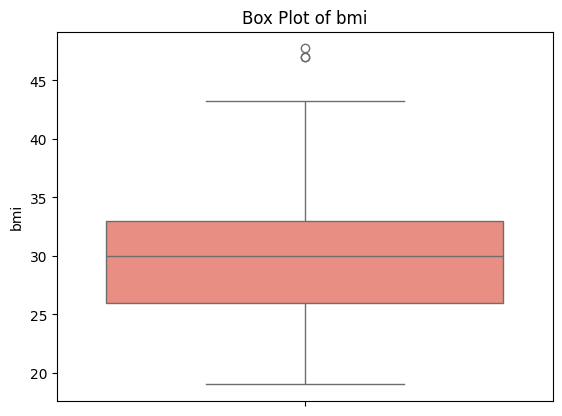

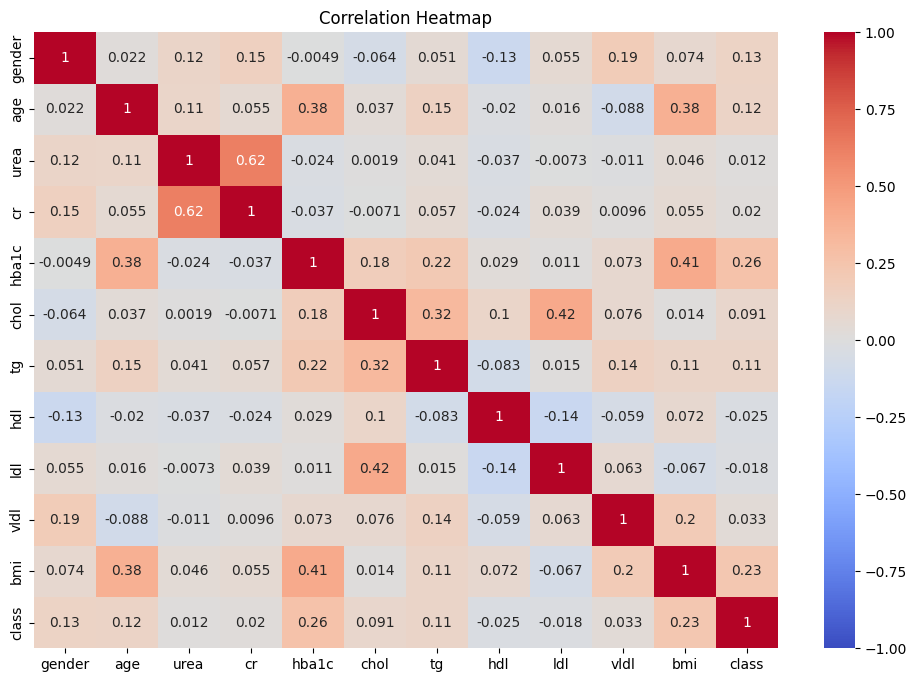

In [ ]:
# Class Distribution
sns.countplot(x='class', data=diabetes_data, palette="coolwarm")
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1, 2], labels=["Non-Diabetic", "Diabetic", "Predicted-Diabetic"])
plt.show()

# Gender Distribution
sns.countplot(x='gender', data=diabetes_data, palette="coolwarm")
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=["Female", "Male"])
plt.show()

# Numeric Feature Distributions
numeric_columns = ['age', 'urea', 'cr', 'hba1c', 'chol', 'tg', 'hdl', 'ldl', 'vldl', 'bmi']
for column in numeric_columns:
    sns.histplot(diabetes_data[column], kde=True, color="skyblue")
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

# Box Plots for Outliers
for column in numeric_columns:
    sns.boxplot(y=diabetes_data[column], color="salmon")
    plt.title(f"Box Plot of {column}")
    plt.ylabel(column)
    plt.show()

# Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = diabetes_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

## III. Data Preprocessing

In [ ]:
# Note: some po sa preprocessing is ginawa na sa EDA because kinailangan po to solve errors
# Drop unnecessary columns
# diabetes_data = diabetes_data.drop(columns=['id', 'no_pation'])
# Standardize and clean 'class' column by stripping spaces and converting to uppercase
# diabetes_data['class'] = diabetes_data['class'].str.strip().str.upper()
# Check unique values in 'class' to ensure proper encoding
# print("Unique values in 'class' column before mapping:", diabetes_data['class'].value_counts(dropna=False))
# Map 'class' to numeric values: N=1, Y=2, P=3
# diabetes_data['class'] = diabetes_data['class'].map({'N': 1, 'Y': 2, 'P': 3})
# Encode 'gender' column to numeric values: F=0, M=1
# diabetes_data['gender'] = diabetes_data['gender'].map({'F': 0, 'M': 1})
# Handle missing value in 'gender' by filling with the mode
# diabetes_data['gender'].fillna(diabetes_data['gender'].mode()[0], inplace=True)
# Confirm there are no remaining missing values
print("\nMissing values after encoding:", diabetes_data.isnull().sum())

# Separate features and target
X = diabetes_data.drop(columns=['class'])
y = diabetes_data['class']

# Balance the dataset using SMOTE
oversampler = SMOTE(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Convert the balanced dataset to a DataFrame and save to CSV
balanced_data = pd.DataFrame(X_resampled, columns=X.columns)
balanced_data['class'] = y_resampled
balanced_data.to_csv('balanced_diabetes_data.csv', index=False)
print("Balanced dataset saved to 'balanced_diabetes_data.csv'.")


Missing values after encoding: gender    0
age       0
urea      0
cr        0
hba1c     0
chol      0
tg        0
hdl       0
ldl       0
vldl      0
bmi       0
class     0
dtype: int64
Balanced dataset saved to 'balanced_diabetes_data.csv'.


**III. Model Development and Model Evaluation**

In [ ]:

# Load the balanced dataset
data = pd.read_csv('balanced_diabetes_data.csv')
X = data.drop(columns=['class'])
y = data['class']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=500),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'k-Nearest Neighbors': KNeighborsClassifier()
}

# Define parameter grids for tuning
param_grids = {
    'Logistic Regression': {'C': [0.01, 0.1, 1, 10, 100]},
    'Random Forest': {'n_estimators': [100, 200], 'max_depth': [10, 15, 20]},
    'Support Vector Machine': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'k-Nearest Neighbors': {'n_neighbors': [3, 5, 7]}
}

#Train, tune, and evaluate each model
for model_name, model in models.items():
    print(f"\nTraining and tuning {model_name}...")
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    print(f"Model: {model_name}")
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.2f}")
    print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.2f}")
    print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted'):.2f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("="*50)


Training and tuning Logistic Regression...
Model: Logistic Regression
Best Parameters: {'C': 100}
Accuracy: 0.94
Precision: 0.95
Recall: 0.94
F1 Score: 0.94
Classification Report:
              precision    recall  f1-score   support

           1       0.97      0.91      0.94       177
           2       0.97      0.95      0.96       173
           3       0.89      0.97      0.93       157

    accuracy                           0.94       507
   macro avg       0.94      0.94      0.94       507
weighted avg       0.95      0.94      0.94       507


Training and tuning Random Forest...
Model: Random Forest
Best Parameters: {'max_depth': 10, 'n_estimators': 100}
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
Classification Report:
              precision    recall  f1-score   support

           1       0.99      1.00      0.99       177
           2       1.00      0.99      0.99       173
           3       1.00      1.00      1.00       157

    accuracy           